In [1]:
# As seguintes librarias serão necessárias para resolver os exercícios
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def runge_kutta_4(t, x, vx, acelera, dt):
    """Numerical integration for a second order derivative in respect
    to the motion.
    
    Parameters
    ----------
    t : float
        Current time instant
    x : float
        Current position of the body
    vx : float
        Current velocity of the body
    acceleration : Callable[[float, float, float], float]
        The acceleration in function of the time, position and velocity (in that order)
    dt : float
        The time step to use in the integration
    
    Returns
    ----------
    xp : float
        The next position
    vxp : float
        The next velocity
    """
    ax1=acelera(t,x,vx)
    c1v=ax1*dt
    c1x=vx*dt
    
    ax2=acelera(t+dt/2.,x+c1x/2.,vx+c1v/2.)
    c2v=ax2*dt
    c2x=(vx+c1v/2.)*dt # predicto: vx(t+dt) * dt
    
    ax3=acelera(t+dt/2.,x+c2x/2.,vx+c2v/2.)
    c3v=ax3*dt
    c3x=(vx+c2v/2.)*dt
    
    ax4=acelera(t+dt,x+c3x,vx+c3v)
    c4v=ax4*dt
    c4x=(vx+c3v)*dt
    
    xp=x+(c1x+2.*c2x+2.*c3x+c4x)/6.
    vxp=vx+(c1v+2.*c2v+2.*c3v+c4v)/6.
    
    return xp, vxp

def abfourier(tp, xp, it0, it1, nf):
    """Computes the fourier series coefficients.
    
    The fourier series coefficients are defined by the following integrals:
    
                  tp(it1)
          2      ⌠
    a   = ─ ⋅    ⌡    xp ⋅ cos(nf ⋅ w) ⋅ dx
     nf   T   tp(it0)
     
                  tp(it1)
          2      ⌠
    b   = ─ ⋅    ⌡    xp ⋅ sin(nf ⋅ w) ⋅ dx
     nf   T   tp(it0)

    This functions operates over a discrete domain, so the integral is replaced
    with a finite summation and the trapezoidal rule to approximate the integral.
    
    Parameters
    ----------
    tp : np.NDArray
        The time series
    xp : np.NDArray
        The position series
    it0 : int
        The index where the analysis start
    it1 : int
        The index where the analysis ends
    nf : int
        The number of the coefficient to compute
    
    Returns
    ----------
    a_f, b_f : float
        The fourier series coefficients
    """
    dt = tp[1] - tp[0] # Time step
    per = tp[it1] - tp[it0] # Period
    ome = 2*np.pi / per # Angular Frequency
    
    s1 = xp[it0] * np.cos(nf*ome*tp[it0])
    s2 = xp[it1] * np.cos(nf*ome*tp[it1])
    st = xp[it0+1:it1] * np.cos(nf*ome*tp[it0+1:it1])
    soma = np.sum(st)
    
    intega = ((s1 + s2)/2 + soma)*dt
    af = 2/per * intega
    
    q1 = xp[it0] * np.sin(nf*ome*tp[it0])
    q2 = xp[it1] * np.sin(nf*ome*tp[it1])
    qt = xp[it0+1:it1] * np.sin(nf*ome*tp[it0+1:it1])
    somq = np.sum(qt)
    
    integq = ((q1 + q2)/2 + somq)*dt
    bf = 2/per * integq
    return af, bf

# Exercício 1

In [3]:
m = 1
k = 1
alpha = 0.05

## Parte A

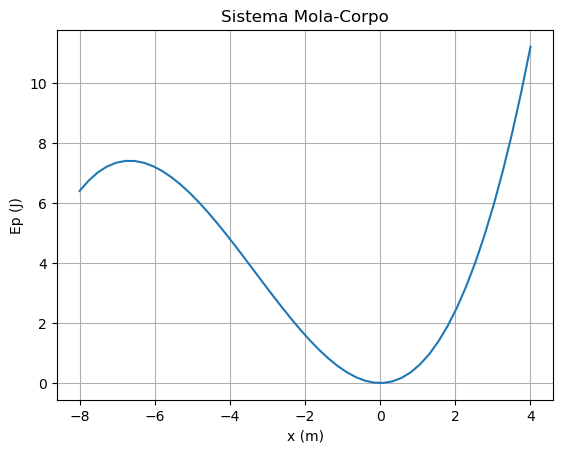

In [4]:
x_space = np.linspace(-8, 4)

Ep = 1/2 * k * x_space**2 + alpha*x_space**3

# Qual o movimento quando a energia total for menor do que 7J
#
# O corpo move-se entre as posições onde Ep<7J
#
# O que acontecerá se a energia total for maior que 8J
#
# O corpo irá entrar num estado de instabilidade onde o
# seu movimento iria efetuar-se sempre no sentido negativo

plt.plot(x_space, Ep)
plt.xlabel("x (m)")
plt.ylabel("Ep (J)")
plt.title("Sistema Mola-Corpo")
plt.grid()
plt.show()

## Parte B

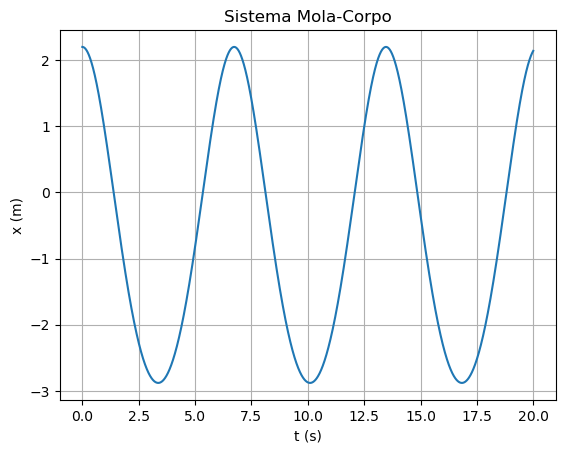

In [5]:
# Initial conditions
x0 = 2.2
v0 = 0
# Parameters
dt = 0.001
t0 = 0
tf = 20

accel = lambda t, x, v: -k/m * x - 3/m*alpha*x**2

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)

t = np.zeros(n + 1) # Tempo
x = np.zeros(n + 1) # Posição
v = np.zeros(n + 1) # Velocidade

# Valores inicias
v[0] = v0
t[0] = t0
x[0] = x0

for i in range(n):
  mx, vx = runge_kutta_4(t[i], x[i], v[i], accel, dt)
  v[i + 1] = vx
  x[i + 1] = mx
  t[i + 1] = t[i] + dt

plt.plot(t, x)
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.title("Sistema Mola-Corpo")
plt.grid()
plt.show()

Energia mecânica = 2.9524


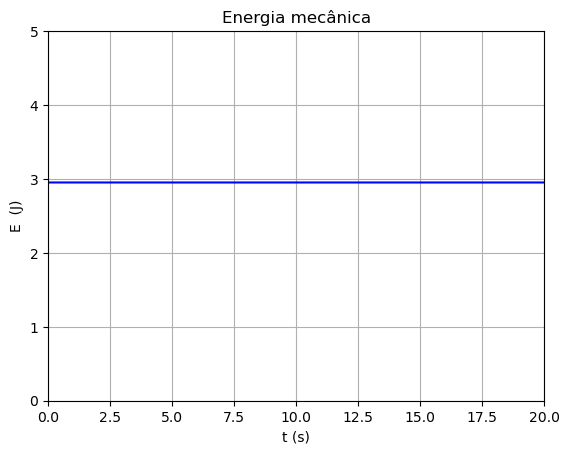

In [6]:
Ep = 1/2 * k * x**2 + alpha*x**3
Em = Ep + 1/2*m*v**2

print(f"Energia mecânica = {np.mean(Em):.4f}") # 2.9524

plt.plot(t, Ep + 1/2*m*v**2, color="blue")
plt.ylabel("E  (J)")
plt.xlabel("t (s)")
plt.margins(0)
plt.ylim([0, 5])
plt.title("Energia mecânica")
plt.grid()
plt.show()

## Parte C

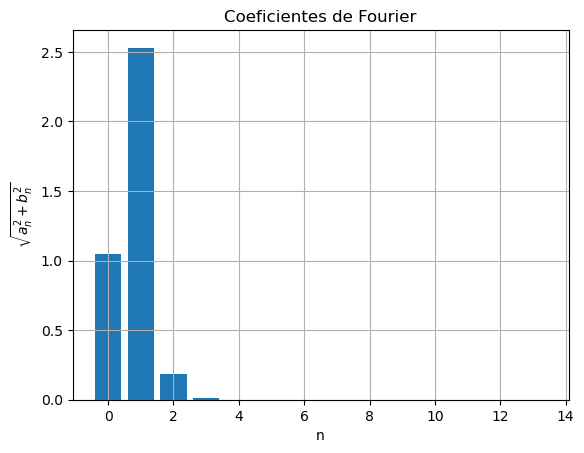

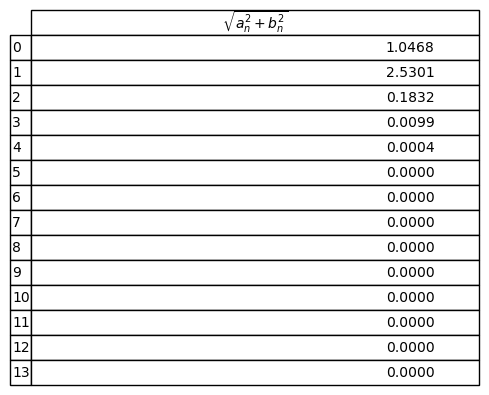

In [7]:
# Valores:
# n=0 => 1.0468
# n=1 => 2.5301
# n=3 => 0.1832
# n=4 => 0.0099
# n=5 => 0.0004
# n>5 => 0

N = 14

inflection = np.diff(np.sign(np.diff(x)))
peaks = (inflection < 0).nonzero()[0] + 1

it0 = peaks[-2]
it1 = peaks[-1]

coeffs = [abfourier(t, x, it0, it1, n) for n in range(N)]
mags = [np.sqrt(coeff[0]**2 + coeff[1]**2) for coeff in coeffs]

ii = np.arange(N)
plt.bar(ii, mags)
plt.xlabel("n")
plt.ylabel("$\sqrt{a_n^2 + b_n^2}$")
plt.title("Coeficientes de Fourier")
plt.grid()
plt.show()

plt.box(on=None)
plt.subplots_adjust(left=0.2, bottom=0.2)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
table = plt.table(
    cellText=[[f"{mag:.4f}"] for mag in mags],
    rowLabels=ii,
    colLabels=["$\sqrt{a_n^2 + b_n^2}$"],
    loc='center'
)
table.scale(1, 1.5)
plt.show()

# Exercício 2

## Parte A

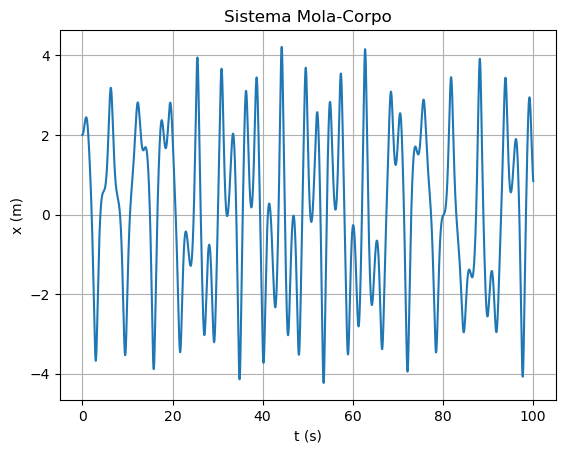

In [8]:
def oscillator(x0):
    m = 1
    k = 1
    alpha = 0.15
    # Initial conditions
    v0 = 0
    # Dampened oscillator
    b = 0.02
    # Forces oscillator
    F_0 = 7.5
    omega_f = 1
    # Parameters
    dt = 0.001
    t0 = 0
    tf = 100

    oscillator = lambda x: - 4/m*alpha*x**3
    accel = lambda t, x, v:  oscillator(x) - (b/m)*v + (F_0/m)*np.cos(omega_f * t)

    # Número de passos/iterações
    #
    # + 0.1 para garantir que não há arrendodamentos
    # para baixo
    n = int((tf-t0) / dt + 0.1)

    t = np.zeros(n + 1) # Tempo
    x = np.zeros(n + 1) # Posição
    v = np.zeros(n + 1) # Velocidade

    # Valores inicias
    v[0] = v0
    t[0] = t0
    x[0] = x0

    for i in range(n):
      mx, vx = runge_kutta_4(t[i], x[i], v[i], accel, dt)
      v[i + 1] = vx
      x[i + 1] = mx
      t[i + 1] = t[i] + dt

    return t, x
        
plt.plot(*oscillator(2))
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.title("Sistema Mola-Corpo")
plt.grid()
plt.show()

## Parte B

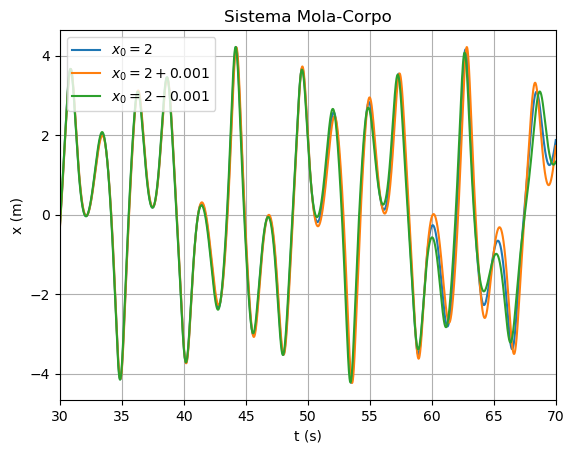

In [9]:
plt.plot(*oscillator(2), label = "$x_0 = 2$")
plt.plot(*oscillator(2 + 0.001), label = "$x_0 = 2 + 0.001$")
plt.plot(*oscillator(2 - 0.001), label = "$x_0 = 2 - 0.001$")
plt.ylabel("x (m)")
plt.xlabel("t (s)")
#plt.margins(0)
plt.xlim([30, 70])
#plt.ylim([-3, 3])
plt.title("Sistema Mola-Corpo")
plt.legend(loc="upper left")
plt.grid()
plt.show()